In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [2]:
#!pip install numpy==1.23
!pip install --upgrade scipy
!pip install TTS
!pip install easyocr
!pip install opencv-python
!pip install gradio
#!pip install matplotlib
#!pip install torch
#!pip install torchvision
#!pip install huggingface_hub
#!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.7 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 21.8 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have n

In [3]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [4]:
import re
from difflib import SequenceMatcher
import numpy as np
def addBs(lista,n):
  val=0.0
  for item in lista:
    words=item.split(' ')
    print(words)
    ctvsMode=False
    for word in words:
      if word=='1' and ctvsMode==False:
        val=1.0
      if word=='2'and ctvsMode==False:
        val=2.0
      if word=='5'and ctvsMode==False:
        val=5.0
      if word=='DIEZ' or word=='10':
        val=10.0
      elif word=='VEINTE'or word=='20':
        val=20.0
      elif word=='CINCUENTA' or word=='50':
        val=50.0
      elif word=='CIEN'or word=='100' and ctvsMode==False:
        val=100.0
      elif word=='DOSCIENTOS'or word=='200'and ctvsMode==False:
        val=200.0

      #cleaned_word = clean_string(word)

      if word=='CENTAVOS':
        val=val/100
        ctvsMode=True
      elif is_similar(word, 'BOLIVIANO')and word.endswith('O'):
        val=1.0

  print(val)
  return val


In [5]:
# Step 1: Function to clean strings
def clean_string(s):
    # Remove special characters [], {}, ()
    return re.sub(r'[{}\[\]()]', '', s)

# Step 3: Function to check similarity
def is_similar(word, target_word, threshold=0.5):
    ratio = SequenceMatcher(None, word, target_word).ratio()
    print(ratio)
    return ratio > threshold

def showImg(img,n):
  if isinstance(img, str):
      img = cv2.imread(img)  # If it's a filepath
  elif isinstance(img, np.ndarray):
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  #img = cv2.imread(img)
  #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  words=[]
  reader = easyocr.Reader(['es'],gpu=True)#,gpu=False)
  result = reader.readtext(img)
  limit_scan=True

  for r in result:
    if limit_scan:
      print(r)
      bbox,text,score=r

      print(text)
      #busca un valor numérico
      values=['1','2','5','10','20','50','100','200']
      if text in values:
        print(" VALUE",text)
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
        cv2.putText(img,text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
        words.append(text)

      filt_text=clean_string(text)
      print("   cleaned: ",filt_text)
      if is_similar(filt_text, 'BOLIVIANOS'):
        print(" VALUE",filt_text)
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
        cv2.putText(img,filt_text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
        words.append(filt_text)
        limit_scan=False

      elif is_similar(filt_text, 'CENTAVOS'):
        print(" VALUE",filt_text)
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
        cv2.putText(img,filt_text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
        words.append('CENTAVOS')
        limit_scan=False

  total=addBs(words,n)

  #print(words)
  img_rgb =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_out = "/content/processed_img_.jpg"
  cv2.imwrite(img_out, img_rgb)
  plt.imshow(img_rgb)
  plt.show()

  return total,img_out

In [ ]:
def showImgCanny(img):
  img=cv2.imread(img)
  words=[]
  image= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  canny=cv2.Canny(image,100,200)
  #sobels=[sobelx,sobely,sobelxy,canny,canny2]

  reader = easyocr.Reader(['es'],gpu=True)#,gpu=False)

  result = reader.readtext(canny)
  for r in result:
    print(r)
    bbox,text,score=r

    print(text)
    #busca un valor numérico
    values=['1','2','5','10','20','50','100','200']
    if text in values:
      print(" VALUE",text)
      top_left = tuple(map(int, bbox[0]))
      bottom_right = tuple(map(int, bbox[2]))
      cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
      cv2.putText(img,text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
      words.append(text)

    filt_text=clean_string(text)
    print("   cleaned: ",filt_text)
    if is_similar(filt_text, 'BOLIVIANOS'):
      print(" VALUE",filt_text)
      top_left = tuple(map(int, bbox[0]))
      bottom_right = tuple(map(int, bbox[2]))
      cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
      cv2.putText(img,filt_text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
      words.append(filt_text)

    elif is_similar(filt_text, 'CENTAVOS'):
      print(" VALUE",filt_text)
      top_left = tuple(map(int, bbox[0]))
      bottom_right = tuple(map(int, bbox[2]))
      cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
      cv2.putText(img,filt_text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
      words.append('CENTAVOS')


  #print(words)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()
  return words

In [ ]:
p1='/content/12.47.11(1)_0.jpeg'
p2='/content/IMG_3285.JPG'
p3='/content/IMG_3282.JPG'
p4="/content/IMG_3279.JPG"
p5='/content/IMG_3280.JPG'
p6='/content/IMG_3284.JPG'
p7='/content/20240917_094009.jpg'

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[125, 23], [327, 23], [327, 43], [125, 43]], 'BANCO CENTRIL DE BOLIVIA', 0.7205319798376401)
BANCO CENTRIL DE BOLIVIA
   cleaned:  BANCO CENTRIL DE BOLIVIA
0.4117647058823529
0.3125
([[408, 18], [446, 18], [446, 44], [408, 44]], '20', 0.5771762409594516)
20
 VALUE 20
   cleaned:  20
0.0
0.0
([[144, 42], [180, 42], [180, 50], [144, 50]], 'ESTADC', 0.21286283103015005)
ESTADC
   cleaned:  ESTADC
0.125
0.42857142857142855
([[194, 40], [250, 40], [250, 48], [194, 48]], 'MAinacioNe', 0.06052091229995448)
MAinacioNe
   cleaned:  MAinacioNe
0.2
0.1111111111111111
([[272, 38], [308, 38], [308, 46], [272, 46]], 'AouNf', 0.060807334782791364)
AouNf
   cleaned:  AouNf
0.26666666666666666
0.15384615384615385
([[75, 141], [171, 141], [171, 209], [75, 209]], '20', 0.9984513704742192)
20
 VALUE 20
   cleaned:  20
0.0
0.0
([[68, 203], [191, 203], [191, 224], [68, 224]], 'VEINTE BOLIVIANOS', 0.9588676371037542)
VEINTE BOLIVIANOS
   cleaned:  VEINTE BOLIVIANOS
0.7407407407407407
 VALUE VEINTE BOLIVIAN

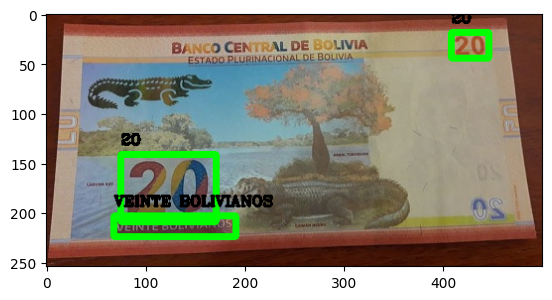

In [ ]:
tot,imgx=showImg(p1,0)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[1138, 719], [2698, 719], [2698, 940], [1138, 940]], 'BANCO CENTRAL DE BOLIVIA', 0.970106151160216)
BANCO CENTRAL DE BOLIVIA
   cleaned:  BANCO CENTRAL DE BOLIVIA
0.4117647058823529
0.375
([[1266, 857], [2567, 857], [2567, 1016], [1266, 1016]], 'ESTADO PLURINACION L DE BOLIVIA', 0.7210530189328014)
ESTADO PLURINACION L DE BOLIVIA
   cleaned:  ESTADO PLURINACION L DE BOLIVIA
0.34146341463414637
0.20512820512820512
([[3355, 829], [3593, 829], [3593, 1016], [3355, 1016]], '10', 0.9996289593104142)
10
 VALUE 10
   cleaned:  10
0.0
0.0
([[2324, 1606], [2563, 1606], [2563, 1644], [2324, 1644]], 'PUYA RAIMONDI', 0.9582753877264246)
PUYA RAIMONDI
   cleaned:  PUYA RAIMONDI
0.17391304347826086
0.19047619047619047
([[541, 1754], [800, 1754], [800, 1799], [541, 1799]], 'ISLA DEL PESCADO', 0.9498153507074167)
ISLA DEL PESCADO
   cleaned:  ISLA DEL PESCADO
0.15384615384615385
0.08333333333333333
([[557, 1786], [792, 1786], [792, 1829], [557, 1829]], 'SALAR DE UYUNI', 0.8509562865874823)
SALAR DE 

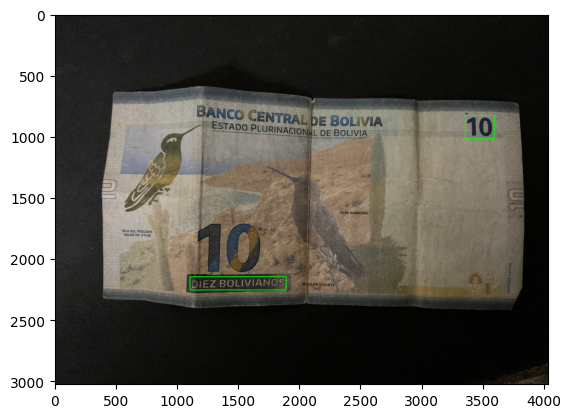

In [ ]:
tot,imgx=showImg(p2,0)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[2096, 1205], [2250, 1205], [2250, 1302], [2096, 1302]], 'jS', 0.29956187794208133)
jS
   cleaned:  jS
0.16666666666666666
0.2
([[1967, 1513], [2449, 1513], [2449, 1653], [1967, 1653]], 'BOLIVTANO', 0.6086080173453505)
BOLIVTANO
   cleaned:  BOLIVTANO
0.8421052631578947
 VALUE BOLIVTANO
['BOLIVTANO']
0.8888888888888888
1.0


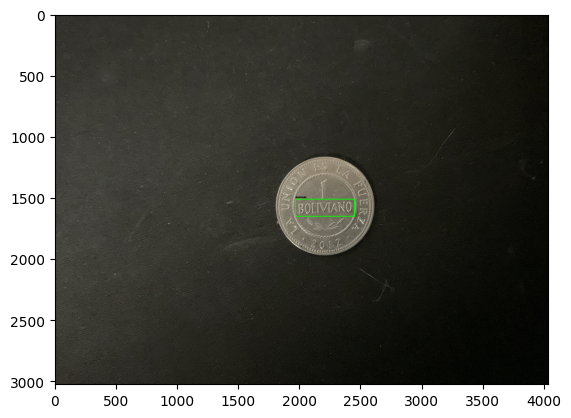

In [ ]:
tot,imgx=showImg(p3,0)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[2146, 1172], [2336, 1172], [2336, 1285], [2146, 1285]], 'E<', 0.1352399458855783)
E<
   cleaned:  E<
0.0
0.2
([[2052, 1356], [2448, 1356], [2448, 1601], [2052, 1601]], '50', 0.9996598075896997)
50
 VALUE 50
   cleaned:  50
0.0
0.0
([[1886, 1572], [2614, 1572], [2614, 1788], [1886, 1788]], '{CENTIVS)', 0.3364204215984409)
{CENTIVS)
   cleaned:  CENTIVS
0.35294117647058826
0.8
 VALUE CENTIVS
['50']
0.0
['CENTAVOS']
0.5


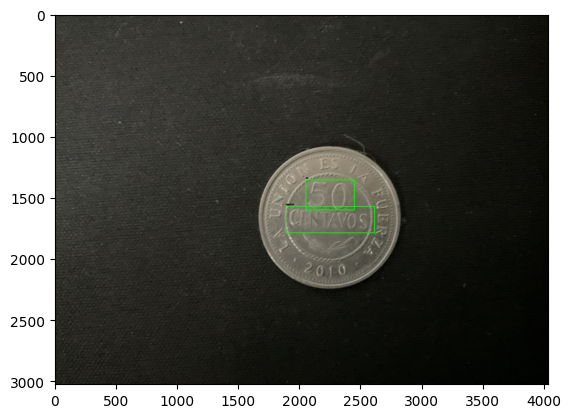

In [ ]:
tot,imgx=showImg(p4,0)

([[2101, 1184], [2270, 1184], [2270, 1300], [2101, 1300]], 'Ps', 0.3487173222845199)
Ps
   cleaned:  Ps
0.0
0.0
([[2036, 1356], [2373, 1356], [2373, 1598], [2036, 1598]], '20', 0.9994137876755608)
20
 VALUE 20
   cleaned:  20
0.0
0.0
([[1856, 1566], [2550, 1566], [2550, 1762], [1856, 1762]], '(CENTAVOS)', 0.2505700719919861)
(CENTAVOS)
   cleaned:  CENTAVOS
0.3333333333333333
1.0
 VALUE CENTAVOS
['20']
0.0
['CENTAVOS']
0.2


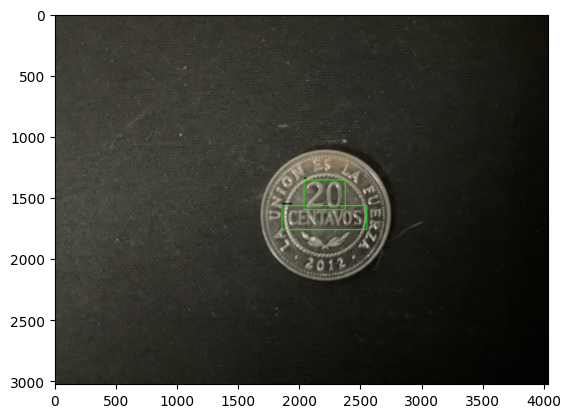

In [ ]:
tot,imgx=showImg(p5,0)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

([[2005, 1475], [2480, 1475], [2480, 1623], [2005, 1623]], 'BOLVTANOS)', 0.5796436435595506)
BOLVTANOS)
   cleaned:  BOLVTANOS
0.8421052631578947
 VALUE BOLVTANOS
['BOLVTANOS']
0.7777777777777778
0.0


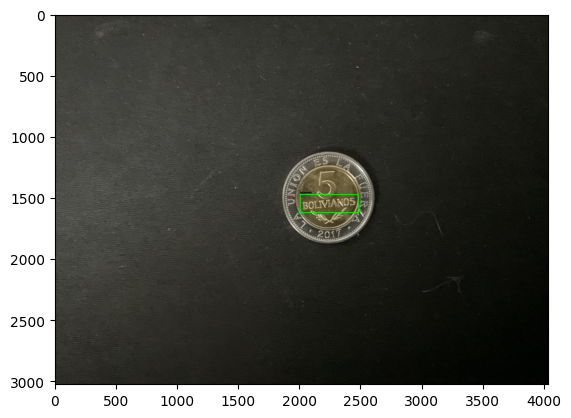

In [ ]:
tot,imgx=showImg(p6,0)

([[2019, 1141], [2205, 1141], [2205, 1252], [2019, 1252]], 'ES', 0.5848794877530662)
ES
   cleaned:  ES
0.16666666666666666
0.4
([[2036, 1317], [2210, 1317], [2210, 1514], [2036, 1514]], '5', 0.22157170053361952)
5
 VALUE 5
   cleaned:  5
0.0
0.0
([[1842, 1546], [2410, 1546], [2410, 1682], [1842, 1682]], 'BOLMIANOS', 0.6815923021411341)
BOLMIANOS
   cleaned:  BOLMIANOS
0.8421052631578947
 VALUE BOLMIANOS
['5']
0.0
['BOLMIANOS']
0.7777777777777778
5.0


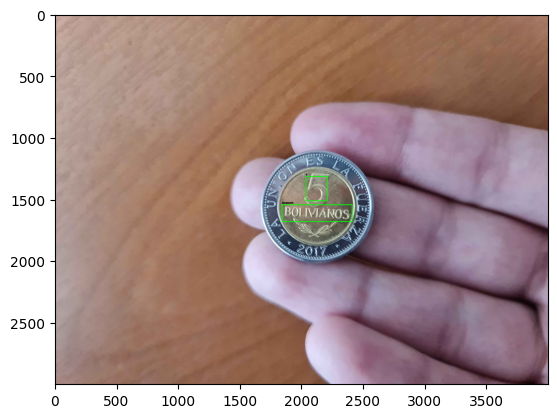

In [ ]:
tot,imgx=showImg(p7,0)

([[2096, 1205], [2250, 1205], [2250, 1302], [2096, 1302]], 'jES', 0.10593177957559925)
jES
   cleaned:  jES
0.15384615384615385
0.36363636363636365
([[1967, 1513], [2449, 1513], [2449, 1653], [1967, 1653]], 'BOLIVTANO', 0.6203905422467347)
BOLIVTANO
   cleaned:  BOLIVTANO
0.8421052631578947
 VALUE BOLIVTANO


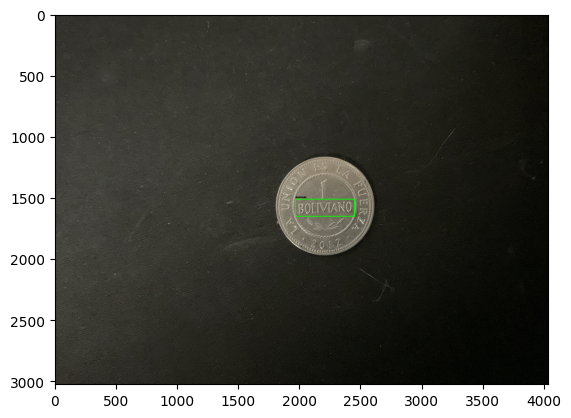

['BOLIVTANO']
0.8888888888888888
1.0


In [ ]:
detect=showImg(p3)
total=addBs(detect,0)

([[2005, 1475], [2480, 1475], [2480, 1623], [2005, 1623]], 'BOLVTANOS)', 0.5437615027231834)
BOLVTANOS)
   cleaned:  BOLVTANOS
0.8421052631578947
 VALUE BOLVTANOS
([[2137, 1756], [2345, 1756], [2345, 1845], [2137, 1845]], '2011', 0.8900771141052246)
2011
   cleaned:  2011
0.0
0.0
([[2099.7646218475907, 1179.2820252056035], [2245.072839757881, 1153.434486747897], [2254.2353781524093, 1235.7179747943965], [2108.927160242119, 1260.565513252103]], 'Es', 0.5728234490110334)
Es
   cleaned:  Es
0.0
0.2
([[2312.1933541266035, 1151.0296161218064], [2458.9998074347686, 1229.9349123820427], [2414.8066458733965, 1308.9703838781936], [2268.0001925652314, 1231.0650876179573]], 'LA', 0.45915593949110955)
LA
   cleaned:  LA
0.3333333333333333
0.2
([[1979.6638690552047, 1199.059626708199], [2090.390156211391, 1242.3027795470173], [1949.3361309447953, 1597.940373291801], [1839.6098437886092, 1554.6972204529827]], '9', 0.020695055750233005)
9
   cleaned:  9
0.0
0.0


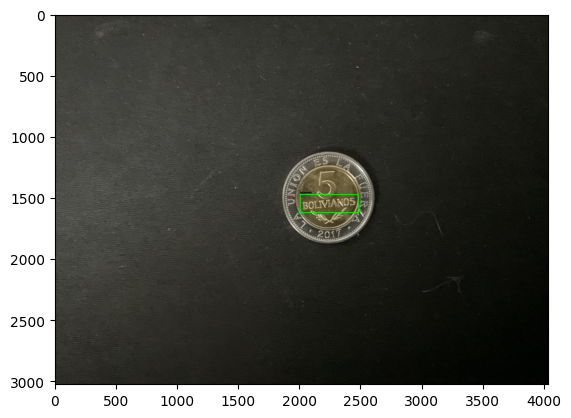

['BOLVTANOS']
0.0


In [ ]:
detect=showImg(p6)
total=addBs(detect,0)

In [ ]:
detect=showImg(p7)
total=addBs(detect,0)

TypeError: showImg() missing 1 required positional argument: 'n'

# **TTS:**

In [ ]:
!tts --list_models


 Name format: type/language/dataset/model
 1: tts_models/multilingual/multi-dataset/xtts_v2
 2: tts_models/multilingual/multi-dataset/xtts_v1.1
 3: tts_models/multilingual/multi-dataset/your_tts
 4: tts_models/multilingual/multi-dataset/bark
 5: tts_models/bg/cv/vits
 6: tts_models/cs/cv/vits
 7: tts_models/da/cv/vits
 8: tts_models/et/cv/vits
 9: tts_models/ga/cv/vits
 10: tts_models/en/ek1/tacotron2
 11: tts_models/en/ljspeech/tacotron2-DDC
 12: tts_models/en/ljspeech/tacotron2-DDC_ph
 13: tts_models/en/ljspeech/glow-tts
 14: tts_models/en/ljspeech/speedy-speech
 15: tts_models/en/ljspeech/tacotron2-DCA
 16: tts_models/en/ljspeech/vits
 17: tts_models/en/ljspeech/vits--neon
 18: tts_models/en/ljspeech/fast_pitch [already downloaded]
 19: tts_models/en/ljspeech/overflow
 20: tts_models/en/ljspeech/neural_hmm
 21: tts_models/en/vctk/vits
 22: tts_models/en/vctk/fast_pitch
 23: tts_models/en/sam/tacotron-DDC
 24: tts_models/en/blizzard2013/capacitron-t2-c50
 25: tts_models/en/blizzard2

In [6]:
from TTS.api import TTS
tts=TTS('tts_models/en/ljspeech/fast_pitch')
print(tts.speakers)
print(tts.languages)

 > Downloading model to /root/.local/share/tts/tts_models--en--ljspeech--fast_pitch


 98%|█████████▊| 451M/458M [00:06<00:00, 82.2MiB/s]

 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Downloading model to /root/.local/share/tts/vocoder_models--en--ljspeech--hifigan_v2



100%|██████████| 458M/458M [00:12<00:00, 37.6MiB/s]


 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Using model: fast_pitch
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024


/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > Vocoder Model: hifigan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Generator Model: hifigan_generator
 > Discriminator Model: hifigan_discriminator
Removing weight norm...
None
None


In [7]:
from TTS.api import TTS
def gen_oudia(text):
  tts=TTS('tts_models/en/ljspeech/fast_pitch')
  # if spanish:
  #   tts=TTS('tts_models/en/jenny/jenny')
  aud_path='audio.wav'
  tts.tts_to_file(text=text, file_path=aud_path)
  return aud_path

In [ ]:
gen_oudia("It appears by the Image you provided that you have a *balance* of 29 Bolivianos, which you’re gonna spend a *cart* on your cart of 30 Bolivianos, You don't have enough money to pay the cart. Try with another amount.")

 > tts_models/en/ljspeech/fast_pitch is already downloaded.
 > vocoder_models/en/ljspeech/hifigan_v2 is already downloaded.
 > Using model: fast_pitch
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024


/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > Vocoder Model: hifigan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Generator Model: hifigan_generator
 > Discriminator Model: hifigan_discriminator
Removing weight norm...
 > Text splitted to sentences.
["It appears by the Image you provided that you have a *balance* of 29 Bolivi

'oudia.wav'

In [ ]:
gen_oudia("el diablo no quiere usar pantalones en mi casa, y no sé por qué")

 > tts_models/en/ljspeech/fast_pitch is already downloaded.
 > vocoder_models/en/ljspeech/hifigan_v2 is already downloaded.
 > Using model: fast_pitch
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024


/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > Vocoder Model: hifigan
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Generator Model: hifigan_generator
 > Discriminator Model: hifigan_discriminator
Removing weight norm...
 > Downloading model to /root/.local/share/tts/tts_models--en--jenny--jenny


100%|██████████| 3.80M/3.80M [09:27<00:00, 6.70kiB/s]
100%|██████████| 1.61G/1.61G [00:46<00:00, 55.4MiB/s]

 > Model's license - custom - see https://github.com/dioco-group/jenny-tts-dataset#important
 > Check https://opensource.org/licenses for more info.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:48000
 | > resample:False
 | > num_mels:100
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:2048
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:512
 | > win_length:2048
 > Text splitted to sentences.
['el diablo no quiere usar pantalones en mi casa, y n

'oudia.wav'

In [ ]:
from TTS.api import TTS
def gen_audio(text):
  sp='male-en-2'
  lan='en'
  tts=TTS('tts_models/multilingual/multi-dataset/your_tts')
  tts.tts_to_file(text=text, speaker=sp,
                  language=lan, file_path='audio.wav')
  return 'audio.wav'

In [ ]:
gen_audio("It appears by the Image you provided that you have a *balance* of 29 Bolivianos, which you’re gonna spend a *cart* on your cart of 30 Bolivianos, You don't have enough money to pay the cart. Try with another amount.")

 > tts_models/multilingual/multi-dataset/your_tts is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | > log_func:np.log10
 | > min_level_db:-

/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > External Speaker Encoder Loaded !!
 > initialization of language-embedding layers.
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:512
 | > power:1.5
 | > preemphasis:0.97
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:False
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:False
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:True
 | > db_level:-27.0
 | > stats_path:None
 | > base:10
 | > hop_length:160
 | > win_length:400
 > Text splitted to sentences.
["It appears by the Image you provided that you have a *balance* of 29 Bolivianos, which you’re gonna spend a 

'audio.wav'

In [ ]:
!pip install -U bitsandbytes accelerate

In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")

# Load the model in 8-bit precision
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B",
                                             device_map='auto',
                                             load_in_8bit=True)

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Generate a response with the quantized model
result = pipe("Question: I have 25 dollars, and I need to pay 21 dollars. How much change should I have? Answer: 4 dollars ",
              max_length=30,
              num_return_sequences=5)

# Print the result
for i, res in enumerate(result):
    print(f"Response {i + 1}: {res['generated_text']}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


ValueError: Input length of input_ids is 30, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer,BitsAndBytesConfig
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")
bnb_config = BitsAndBytesConfig(load_in_4bit=True)
# Load the model in 8-bit precision
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B",
                                             device_map='auto',
                                             quantization_config=bnb_config,
                                             #weights='int4'
                                             )

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer,max_length=200)

# Generate a response with the quantized model
result = pipe("I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars , Question: I have 23 dollars, and I need to pay 17 dollars. Answer: ")

print(result[0]['generated_text'])
# Print the result
# for i, res in enumerate(result):
#     print(f"Response {i + 1}: {res['generated_text']}")


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:435: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars , Question: I have 23 dollars, and I need to pay 17 dollars. Answer: 23pekFRINGregonёр JurchwitzSFMLolonatyähệnhbatim judgeochen麗isherchlýšibandollow筒egmentše"<?furtPILEیدیiaisXB�opensourceisettingselden evacadla_warnassinypi.biz/trunk LENGuentesAVISucharbiên dapoulouseafc�stryércheeladfturnstileollow PlaylistActionCreators_tail rangingTypeIDigy glossπίabusahatelagevakfurtürkebekonseicensed patchesutzerfurtürk.***.***_<?_<?wald � Destruction�furt_<?_<?_<? �_<? Destruction �_<? � Destruction_<?_<?_<?_<?�470utzer_<?utzer_<?onse �onse_<?470_<?emouth_<?


In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")

# Create a BitsAndBytesConfig object for 8-bit quantization
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,  # Enable 8-bit loading
    load_in_8bit_fp32_cpu_offload=True  # Offload FP32 layers to CPU
)

# Load the model in 8-bit precision with automatic CPU offloading
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3.1-8B",
    device_map="auto",  # Automatically map layers between GPU and CPU
    quantization_config=bnb_config,  # Use the BitsAndBytesConfig for 8-bit quantization
)

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_length=200)

# Generate a response with the quantized model
result = pipe(
    "I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: "
    "You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars. "
    "Question: I have 23 dollars, and I need to pay 17 dollars. Answer: "
)

# Print the generated text
print(result[0]['generated_text'])



Unused kwargs: ['load_in_8bit_fp32_cpu_offload']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `load_in_8bit_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the tokenizer and model from local paths
local_model_path = "/content/gemmaModel"
local_tokenizer_path = "/content/gemmaTok"

model = AutoModelForCausalLM.from_pretrained(local_model_path)
tokenizer = AutoTokenizer.from_pretrained(local_tokenizer_path)


Guardar modelos entrenados para local:

In [ ]:
model.save_pretrained("/content/gemma/gemmaModel")
tokenizer.save_pretrained("/content/gemma/gemmaTok")

# **LLM: Gemma**

In [8]:
# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)
model.to("cuda")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Gemma2ForCausalLM(
  (model): Gemma2Model(
    (embed_tokens): Embedding(256000, 2304, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma2DecoderLayer(
        (self_attn): Gemma2SdpaAttention(
          (q_proj): Linear(in_features=2304, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2304, out_features=1024, bias=False)
          (v_proj): Linear(in_features=2304, out_features=1024, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2304, bias=False)
          (rotary_emb): Gemma2RotaryEmbedding()
        )
        (mlp): Gemma2MLP(
          (gate_proj): Linear(in_features=2304, out_features=9216, bias=False)
          (up_proj): Linear(in_features=2304, out_features=9216, bias=False)
          (down_proj): Linear(in_features=9216, out_features=2304, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma2RMSNorm((2304,), eps=1e-06)
        (post_attention_layernorm): Gemma2RMSNorm((2304,), 

In [9]:
def spanish_tr(input_text):
  input_text = f"""
  Translate From English to spanish:

  {input_text}
  Traduction: """


  input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

  outputs = model.generate(**input_ids, max_new_tokens=75,
                           do_sample=True,
                           temperature=0.4,  # Make output less random
                           top_p=0.9,        # Use nucleus sampling
                           top_k=60 )
  ans=tokenizer.decode(outputs[0])

  ans=ans.split("Traduction:")[1].strip()
  ans=ans.split("\n")[0]
  return ans

In [10]:
def generate_response(balance,cart,spanish,voice):
  input_text = f"""
  Please follow the following format strictly:

  Question: I have 22.50 Bolivianos, and I need to pay 17 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 22.5 Bolivianos, which you’re gonna spend a *cart* on your cart of 17 Bolivianos, so, doing the math: balance - cart = total. your change should be 5.5 Bolivianos.

  Question: I have 23 Bolivianos, and I need to pay 15.5 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 23 Bolivianos, which you’re gonna spend a *cart* on your cart of 15.5 Bolivianos, so, doing the math: balance - cart = total. your change should be 7.5 Bolivianos.

  Question: I have 29 Bolivianos, and I need to pay 30 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 29 Bolivianos, which you’re gonna spend a *cart* on your cart of 30 Bolivianos, You don't have enough money to pay the cart. Try with another amount.

  Question: I have {balance} Bolivianos, and I need to pay {cart} Bolivianos. how much change should I have?
  Answer: """


  input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

  outputs = model.generate(**input_ids, max_new_tokens=75,
                           temperature=0.7,  # Make output less random
                           top_p=0.9,        # Use nucleus sampling
                           top_k=60 )
  ans=tokenizer.decode(outputs[0])
  print(ans)
  if "Answer:" in ans:
    generated_text = ans.split("Answer:")[4].strip()

  generated_text=generated_text.split("**")[0]
  print(generated_text)
  if spanish:
    generated_text=spanish_tr(generated_text)
  audio=None
  if voice:
    audio=gen_oudia(generated_text)

  return generated_text,audio

In [ ]:
ans=generate_response(23.00,17.50,False,True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:589: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `60` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


<bos>
  Please follow the following format strictly:

  Question: I have 22.50 Bolivianos, and I need to pay 17 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 22.5 Bolivianos, which you’re gonna spend a *cart* on your cart of 17 Bolivianos, so, doing the math: balance - cart = total. your change should be 5.5 Bolivianos.

  Question: I have 23 Bolivianos, and I need to pay 15.5 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 23 Bolivianos, which you’re gonna spend a *cart* on your cart of 15.5 Bolivianos, so, doing the math: balance - cart = total. your change should be 7.5 Bolivianos.

  Question: I have 29 Bolivianos, and I need to pay 30 Bolivianos. how much change should I have?
  Answer: It appears by the Image you provided that you have a *balance* of 29 Bolivianos, which you’re gonna spend a *cart* on your cart of 30 Bolivianos, You don't

/usr/local/lib/python3.10/dist-packages/TTS/utils/io.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_location, **kwargs)


 > External Speaker Encoder Loaded !!
 > initialization of language-embedding layers.
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:512
 | > power:1.5
 | > preemphasis:0.97
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:False
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:False
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:True
 | > db_level:-27.0
 | > stats_path:None
 | > base:10
 | > hop_length:160
 | > win_length:400
 > Text splitted to sentences.
['It appears by the Image you provided that you have a *balance* of 23.0 Bolivianos, which you’re gonna spend 

In [ ]:
ans

'Parece que con la imagen que me proporcionaste, tienes un saldo de 23.0 bolivianos, que vas a gastar en tu carrito de 17.5 bolivianos, así que, haciendo el cálculo: saldo - carrito = total. Tu cambio debería ser de 5.5 bolivianos.'

In [ ]:
spanish_tr("the devil doesn't want to use pants in my house, and I don't know why")

'el diablo no quiere usar pantalones en mi casa, y no sé por qué'

In [ ]:
spanish_tr(ans)

<bos>
  Translate From English to spanish:
  
  It appears by the Image you provided that you have a *balance* of 23.0 Bolivianos, which you’re gonna spend a *cart* on your cart of 17.5 Bolivianos, so, doing the math: balance - cart = total. your change should be 5.5 Bolivianos.


 
  Traduction: 

  Parece que con la imagen que proporcionaste, tienes un saldo de 23.0 bolivianos, que vas a gastar en tu carrito de 17.5 bolivianos, así que, haciendo el cálculo: saldo - carrito = total. Tu cambio debería ser de 5.5 bolivianos. 
<end_of_turn>


In [11]:
import gradio as gr

# Sample items list
items = [
    {'name': "Fried Chicken", 'image': "https://www.allrecipes.com/thmb/SoBuPU73KcbYHl3Kp3j8Xx4A3fc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/8805-CrispyFriedChicken-mfs-3x2-072-d55b8406d4ae45709fcdeb58a04143c2.jpg", 'price': 20.50},
    {'name': "Burger", 'image': "https://www.tastingtable.com/img/gallery/heres-how-hamburgers-got-their-name/intro-1653066580.jpg", 'price': 15.00},
    {'name': "Pizza", 'image': "https://www.laespanolaaceites.com/wp-content/uploads/2019/06/pizza-con-chorizo-jamon-y-queso-1080x671.jpg", 'price': 18.75}
]

# Function to update the total when adding to cart
def add_to_cart(total, item_name):
    # Find the item by name in the list
    item = next((i for i in items if i['name'] == item_name), None)
    if item:
        total += item['price']
    return round(total, 2)  # Return total rounded to 2 decimal places

# Function to update the total when removing from cart
def remove_from_cart(total, item_name):
    # Find the item by name in the list
    item = next((i for i in items if i['name'] == item_name), None)
    if item and total >= item['price']:  # Ensure you don't go negative
        total -= item['price']
    return round(total, 2)  # Return total rounded to 2 decimal places

def toggle_audio_visibility(enable_voice):
    return gr.update(visible=enable_voice)

# Gradio UI setup
def main():
    with gr.Blocks() as app:
        # Main menu display
        with gr.Column(visible=True) as menu:
            # Set precision to 2 to handle floating-point numbers
            total_display = gr.Number(value=0.00, label="Cart Total", interactive=False, precision=2)

            for item in items:
              with gr.Row():
                gr.Image(item['image'], label=f"{item['name']} - ${item['price']}").height=200
                # Use item name as a simple string input for add_to_cart and remove_from_cart
                gr.Button(f"Add {item['name']} to cart").click(add_to_cart, inputs=[total_display, gr.State(item['name'])], outputs=total_display)
                gr.Button(f"Remove {item['name']} from cart").click(remove_from_cart, inputs=[total_display, gr.State(item['name'])], outputs=total_display)

            saldo = gr.Number(value=0.00, label="Saldo disponible", interactive=False, precision=2)

            with gr.Row():
              image_input = gr.Image(type="numpy", label="Drag and drop an image")
              image_output = gr.Image(label="Processed Image")  # To display processed image
              gr.Button("Process Image").click(showImg, inputs=[image_input, saldo], outputs=[saldo,image_output ])

            response = gr.Textbox(label="response", interactive=False)
            audio_output = gr.Audio(label="Generated Audio", visible=False)
            with gr.Row():
              voice = gr.Checkbox(label="Enable Voice", value=False)
              spanish = gr.Checkbox(label="Translate to spanish", value=False)
          # Checkout phase (you can expand this later if needed)
              gr.Button("Checkout").click(generate_response,inputs=[saldo,total_display,spanish,voice],outputs=[response,audio_output])

            voice.change(fn=toggle_audio_visibility, inputs=voice, outputs=audio_output)
    return app

# Launch the app
app = main()
app.launch()#debug=True)



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cd22b1a32661d91671.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
